In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
sum(data.duplicated()) 

0

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
data['BMI']=data['BMI'].astype('int64')

In [11]:
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].astype('int64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.548177,0.071615,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.860602,0.277494,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.000000,0.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.000000,81.000000,1.000000


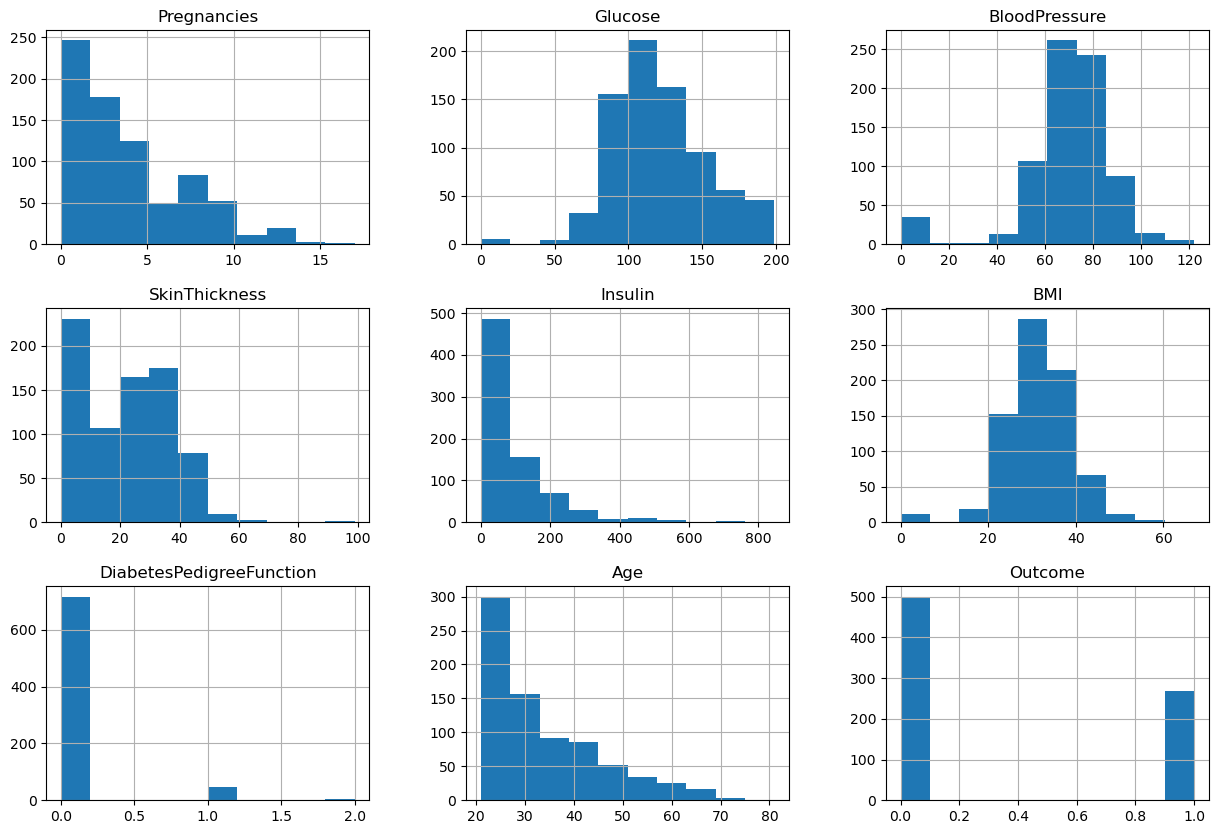

In [14]:
data.hist(figsize=(15, 10))
plt.show()

In [15]:
# data["Pregnancies"]=np.log(data['Pregnancies']+1)
# data["SkinThickness"]=np.log(data['SkinThickness']+1)
# data["Insulin"]=np.log(data['Insulin']+1)
# data["DiabetesPedigreeFunction"]=np.log(data['DiabetesPedigreeFunction']+1)
# data["Age"]=np.log(data['Age']+1)
# data["Outcome"]=np.log(data['Outcome']+1)

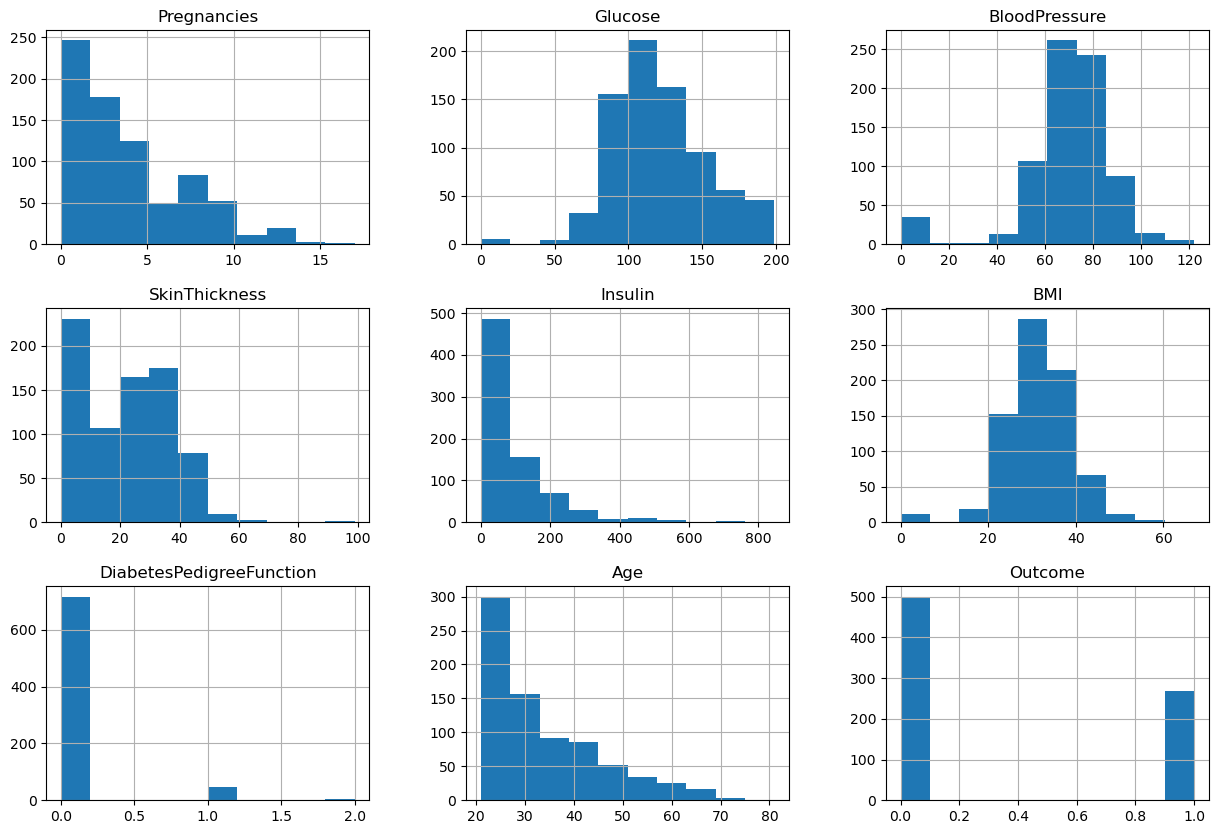

In [16]:
data.hist(figsize=(15, 10))
plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


In [18]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.016501,-0.014610,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.218293,0.133843,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.279822,0.066559,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.393608,0.122670,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197368,0.119496,-0.042163,0.130548
BMI,0.016501,0.218293,0.279822,0.393608,0.197368,1.000000,0.109890,0.034266,0.292494
DiabetesPedigreeFunction,-0.014610,0.133843,0.066559,0.122670,0.119496,0.109890,1.000000,0.032661,0.126164
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.034266,0.032661,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292494,0.126164,0.238356,1.000000


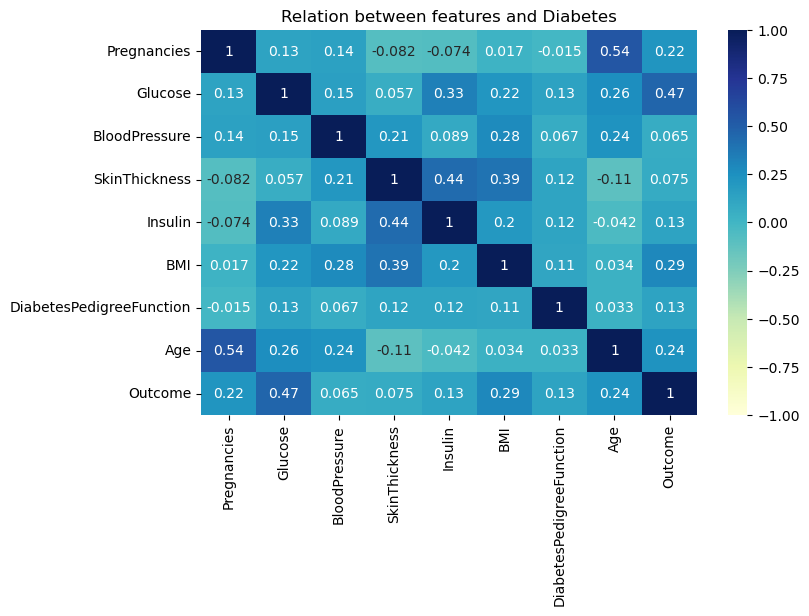

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap='YlGnBu', annot=True, vmin=-1, vmax=1)
plt.title('Relation between features and Diabetes')
plt.show()

In [20]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

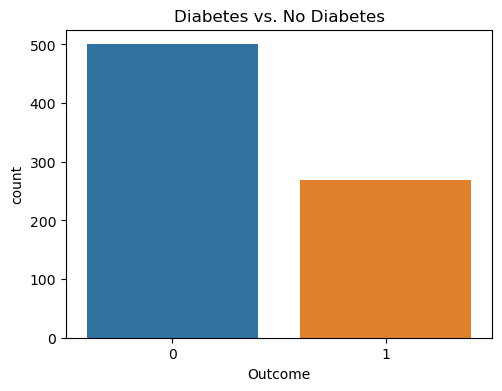

In [21]:
plt.figure(figsize=(5.5, 4))
sns.countplot(data=data, x="Outcome")
plt.title('Diabetes vs. No Diabetes')
plt.show()



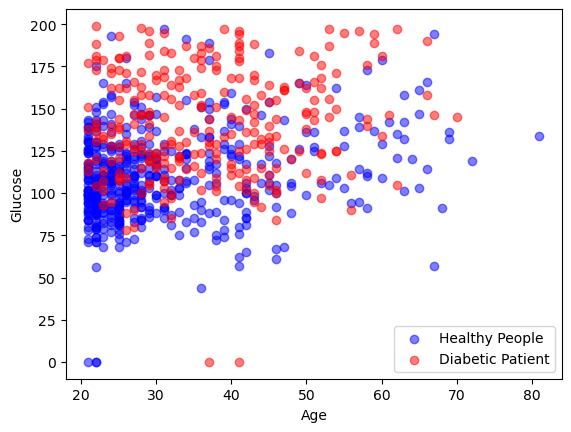

In [22]:
diabetic_people = data[data['Outcome'] == 1]
healthy_people = data[data['Outcome'] == 0]

plt.scatter(healthy_people.Age, healthy_people.Glucose, color = 'blue', label='Healthy People', alpha = 0.5)
plt.scatter(diabetic_people.Age, diabetic_people.Glucose, color = 'red', label='Diabetic Patient', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

In [23]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,29.866000,0.046000,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,34.686567,0.119403,37.067164


In [24]:
X = data.drop(columns='Outcome', axis=1)
y = data['Outcome']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=0) 

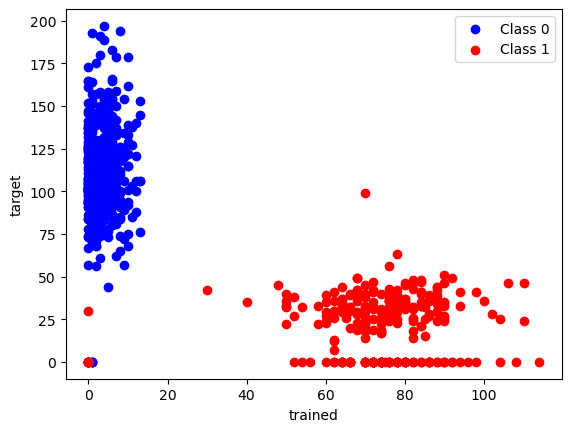

In [27]:
plt.scatter(X[y == 0]['Pregnancies'], X[y == 0]['Glucose'], c='blue', label='Class 0')
plt.scatter(X[y == 1]['BloodPressure'], X[y == 1]['SkinThickness'], c='red', label='Class 1')

# Set plot labels and legend
plt.xlabel('trained')
plt.ylabel('target')
plt.legend()

# Display the plot
plt.show()

In [28]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)



Accuracy: 0.7597402597402597
Confusion Matrix:
 [[82 17]
 [20 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [30]:
X = data.drop(["Outcome"], axis=1)  # Features
y = data["Outcome"]  # Target variable

# Create a LogisticRegression model and fit it to the data
reg = LogisticRegression()
reg.fit(X, y)

LogisticRegression()

In [31]:
print("Accuracy --> ", reg.score(X, y)*100)



Accuracy -->  77.08333333333334


In [32]:
predictions = reg.predict(X)


In [33]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from sklearn.decomposition import PCA

# # Assuming your DataFrame is named 'data' with the specified columns
# X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
# y = data['Outcome']

# # Apply PCA for dimensionality reduction
# pca = PCA(n_components=2)
# X_reduced = pca.fit_transform(X)

# # Create and train a Logistic Regression model on the reduced data
# model = LogisticRegression()
# model.fit(X_reduced, y)

# # Define the boundaries of the plot
# x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
# y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1

# # Generate a grid of points to plot the decision boundary
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Create a scatter plot for the data points
# plt.scatter(X_reduced[y == 0][:, 0], X_reduced[y == 0][:, 1], c='blue', label='Class 0')
# plt.scatter(X_reduced[y == 1][:, 0], X_reduced[y == 1][:, 1], c='red', label='Class 1')

# # Plot the decision boundary
# plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# # Set plot labels and legend
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()

# # Display the plot
# plt.show()
